In [178]:
#predict the overall rating of soccer player based on their attributes
#such as 'crossing', 'finishing etc.
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [179]:
# Create your connection.
con = sqlite3.connect('/Users/kamalesh_das/Desktop/Python/data/database.sqlite')
player_df = pd.read_sql_query("select * from Player_Attributes;", con)

In [180]:
player_df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [181]:
print(player_df.head())
#Check if any null value present in any column
player_df.columns[player_df.isnull().any()].tolist()
#There is some clumns having null values.
print(player_df.dropna().info())
print(player_df.info())

   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

      ...       vision  pe

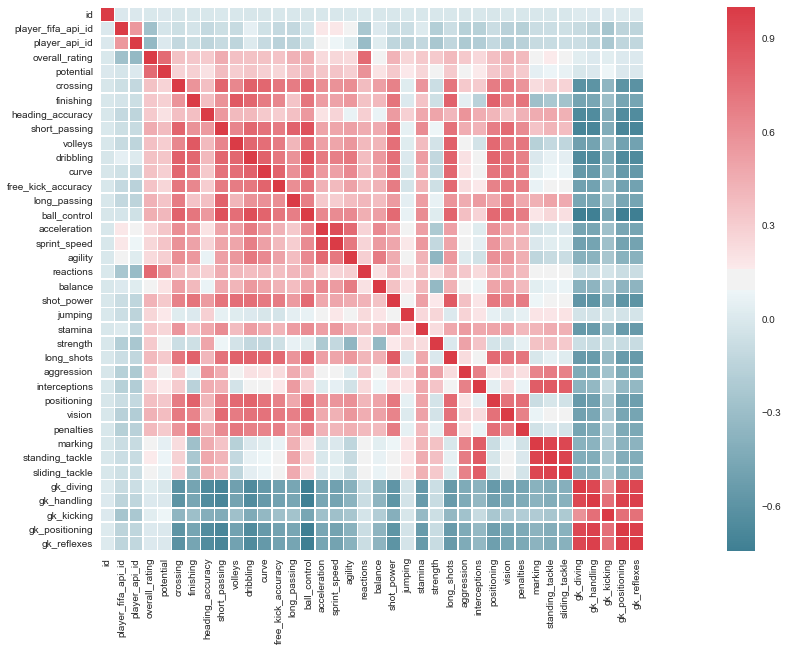

In [182]:
#Now create Corelation Matrix and plot heatmap 
sns.set(style="whitegrid")
# Compute the correlation matrix
corr = player_df.dropna().corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, ax=ax)

#### From the Hitmap , we can see that there are strong relations for all the columns except
#### id columns, overall_rating and gk_* columns

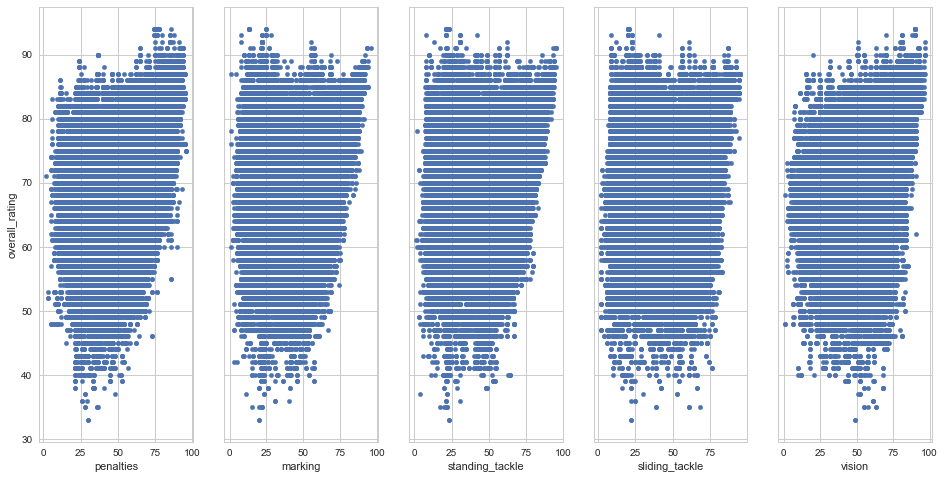

In [71]:
# We will now see how there are relations with different columns
'''
Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')
'''



fig, axs = plt.subplots(1, 5, sharey=True)
#player_df.plot(kind='scatter', x='potential', y='overall_rating', ax=axs[0], figsize=(16, 8))
#player_df.plot(kind='scatter', x='crossing', y='overall_rating', ax=axs[1])
#player_df.plot(kind='scatter', x='finishing', y='overall_rating', ax=axs[2])
#player_df.plot(kind='scatter', x='heading_accuracy', y='overall_rating', ax=axs[3])
#player_df.plot(kind='scatter', x='short_passing', y='overall_rating', ax=axs[4])
#player_df.plot(kind='scatter', x='volleys', y='overall_rating', ax=axs[0], figsize=(16, 8))
#player_df.plot(kind='scatter', x='dribbling', y='overall_rating', ax=axs[1])
#player_df.plot(kind='scatter', x='curve', y='overall_rating', ax=axs[2])
#player_df.plot(kind='scatter', x='free_kick_accuracy', y='overall_rating', ax=axs[3])
#player_df.plot(kind='scatter', x='long_passing', y='overall_rating', ax=axs[4])
#player_df.plot(kind='scatter', x='ball_control', y='overall_rating', ax=axs[0], figsize=(16, 8))
#player_df.plot(kind='scatter', x='acceleration', y='overall_rating', ax=axs[1])
#player_df.plot(kind='scatter', x='sprint_speed', y='overall_rating', ax=axs[2])
#player_df.plot(kind='scatter', x='agility', y='overall_rating', ax=axs[3])
#player_df.plot(kind='scatter', x='reactions', y='overall_rating', ax=axs[4])

#player_df.plot(kind='scatter', x='balance', y='overall_rating', ax=axs[0], figsize=(16, 8))
#player_df.plot(kind='scatter', x='shot_power', y='overall_rating', ax=axs[1])
#player_df.plot(kind='scatter', x='jumping', y='overall_rating', ax=axs[2])
#player_df.plot(kind='scatter', x='stamina', y='overall_rating', ax=axs[3])
#player_df.plot(kind='scatter', x='strength', y='overall_rating', ax=axs[4])

#player_df.plot(kind='scatter', x='long_shots', y='overall_rating', ax=axs[0], figsize=(16, 8))
#player_df.plot(kind='scatter', x='aggression', y='overall_rating', ax=axs[1])
#player_df.plot(kind='scatter', x='interceptions', y='overall_rating', ax=axs[2])
#player_df.plot(kind='scatter', x='positioning', y='overall_rating', ax=axs[3])
#player_df.plot(kind='scatter', x='vision', y='overall_rating', ax=axs[4])

player_df.plot(kind='scatter', x='penalties', y='overall_rating', ax=axs[0], figsize=(16, 8))
player_df.plot(kind='scatter', x='marking', y='overall_rating', ax=axs[1])
player_df.plot(kind='scatter', x='standing_tackle', y='overall_rating', ax=axs[2])
player_df.plot(kind='scatter', x='sliding_tackle', y='overall_rating', ax=axs[3])
player_df.plot(kind='scatter', x='vision', y='overall_rating', ax=axs[4])

#player_df.plot(kind='scatter', x='gk_diving', y='overall_rating', ax=axs[0], figsize=(16, 8))
#player_df.plot(kind='scatter', x='gk_handling', y='overall_rating', ax=axs[1])
#player_df.plot(kind='scatter', x='gk_kicking', y='overall_rating', ax=axs[2])
#player_df.plot(kind='scatter', x='gk_positioning', y='overall_rating', ax=axs[3])
#player_df.plot(kind='scatter', x='gk_reflexes', y='overall_rating', ax=axs[4])

## From the scatter plot, we can say that below attributes's are best fitting
# 'potential', 'preferred_foot', 'attacking_work_rate',
# 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
# 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
# 'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
# 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
# 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
# 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',

In [183]:
##Feature Selection for X
X_df = pd.get_dummies(player_df, columns=['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'])
X=X_df.drop(['overall_rating','id','player_fifa_api_id','player_api_id','date','gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes'],axis=1)

In [184]:
###### Data manipulation ########
X.fillna(0,inplace=True)

In [185]:
X.isnull().sum()
## Filling up all missing values
#imput = Imputer()
#X = imput.fit_transform(X_temp)
#X=X_temp.drop_na()



potential                     0
crossing                      0
finishing                     0
heading_accuracy              0
short_passing                 0
volleys                       0
dribbling                     0
curve                         0
free_kick_accuracy            0
long_passing                  0
ball_control                  0
acceleration                  0
sprint_speed                  0
agility                       0
reactions                     0
balance                       0
shot_power                    0
jumping                       0
stamina                       0
strength                      0
long_shots                    0
aggression                    0
interceptions                 0
positioning                   0
vision                        0
penalties                     0
marking                       0
standing_tackle               0
sliding_tackle                0
preferred_foot_left           0
preferred_foot_right          0
attackin

In [186]:
target = player_df['overall_rating']

In [187]:
target.isnull().values.sum()
#target.count()

#So here 836 missing values are present

836

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([7.0000e+00, 6.0000e+00, 2.0000e+01, 6.5000e+01, 9.4000e+01,
        1.4200e+02, 2.9400e+02, 5.2600e+02, 1.2510e+03, 1.8450e+03,
        2.5780e+03, 4.0870e+03, 6.1890e+03, 9.6500e+03, 1.3745e+04,
        1.8366e+04, 2.0310e+04, 2.0773e+04, 1.9382e+04, 1.8784e+04,
        1.5915e+04, 1.1254e+04, 7.5250e+03, 4.9470e+03, 2.8290e+03,
        1.4590e+03, 7.4800e+02, 2.2800e+02, 8.4000e+01, 3.9000e+01]),
 array([33.        , 35.03333333, 37.06666667, 39.1       , 41.13333333,
        43.16666667, 45.2       , 47.23333333, 49.26666667, 51.3       ,
        53.33333333, 55.36666667, 57.4       , 59.43333333, 61.46666667,
        63.5       , 65.53333333, 67.56666667, 69.6       , 71.63333333,
        73.66666667, 75.7       , 77.73333333, 79.76666667, 81.8       ,
        83.83333333, 85.86666667, 87.9       , 89.93333333, 91.96666667,
        94.        ]),
 <a list of 30 Patch objects>)

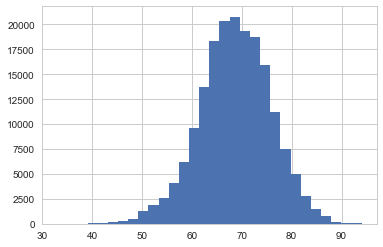

In [149]:
plt.hist(target, 30, range=(33, 94))

In [189]:
#As we can see target column is normally distributed. So we can fill all null values using mean value
y = target.fillna(target.mean())

In [190]:
y.isnull().values.any()

#Now 

False

In [191]:
## Create test and train data from datasets with 33% and 77% respectively
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.25, random_state=40)

##Create Linear regression model using train data
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [192]:
## Calculate Slope(Intercept) and Constant(Coefficient)
print ('Intercept :', lm.intercept_)
print ('Coefficients :', lm.coef_)

#variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(x_test, y_test))

Intercept : 68.59965942794048
Coefficients : [ 5.11301406e-01  3.83950956e-02  2.09844466e-03 -1.79258708e-02
  8.88990241e-04 -2.12193712e-03 -1.94940544e-02  4.00150704e-03
  6.17964924e-03  4.88778663e-02  1.96131487e-02 -1.87928022e-02
 -2.21189472e-02 -2.84762975e-03  3.02282515e-01 -5.21264881e-03
  1.45910229e-02  4.55167559e-02 -1.33914286e-02  8.92875571e-02
 -4.23841823e-03  1.16123475e-02  7.53531075e-04 -1.49283771e-02
 -4.73418988e-03  1.43573312e-02  1.66790916e-02 -1.70888232e-04
 -4.59013326e-02 -4.78554879e+10 -4.78554879e+10  3.24439673e+10
  3.24439673e+10  2.44192572e+10  3.24439673e+10  3.24439673e+10
  2.39821749e+10  2.21158017e+10  2.23821112e+10  1.54115206e+10
  1.54115206e+10  1.54115206e+10  1.54115206e+10  1.54115206e+10
  1.54115206e+10  1.54115206e+10  1.54115206e+10  1.54115206e+10
  1.54115206e+10  4.78554879e+10  2.34362306e+10  2.54733766e+10
  1.54115206e+10  1.54115206e+10  1.54115206e+10  1.54115206e+10
  2.38733129e+10  2.57396862e+10]
Variance sc

In [193]:
##Predict the value using test data
pred_test = lm.predict(x_test)
# The mean squared error using test data
print("Mean squared error with test data: %.2f"
      % np.mean((pred_test - y_test) ** 2))


##Predict the value using train data
pred_train = lm.predict(x_train)
# The mean squared error using train data
print("Mean squared error with train data: %.2f"
      % np.mean((pred_train - y_train) ** 2))

### As both MSE are almost in a same range , 
### hence we can say that model is fitted with both train data and test data

Mean squared error with test data: 10.44
Mean squared error with train data: 10.35


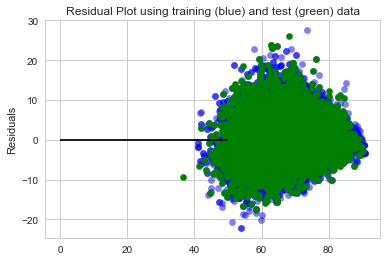

In [194]:
#Residual plots

plt.scatter(pred_train, pred_train - y_train, c='b', s=40, alpha=0.5)
plt.scatter(pred_test, pred_test - y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.show()

In [195]:
#cross validation using k=4 to check performance of the model
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(lm, X.values,y.values, cv=10)
# Print the accuracy for each fold:
print ('Accuracies of 10 folds: ' , scores)

# And the mean accuracy of all 10 folds:
print ('Mean accuracy of 10 folds with all columns: ' , scores.mean())

msePTRATIO = np.mean((y - lm.predict(X)) ** 2)
print ("Mean squared error for the model is : %.2f" %msePTRATIO)

print('Score of the model is :',lm.score(X, y))

mse= mean_squared_error(y_test, pred_test)

print('Mean Square',mse)
r2_score(y_test, pred_test)

Accuracies of 10 folds:  [0.79915394 0.79242446 0.78280347 0.77982026 0.78365792 0.77638143
 0.80773383 0.78556659 0.78401401 0.79334592]
Mean accuracy of 10 folds with all columns:  0.7884901830811836
Mean squared error for the model is : 10.38
Score of the model is : 0.7897725049693357
Mean Square 10.436055227679587


0.7895672821602592

In [196]:
model1=sm.OLS(y_train,x_train)
result=model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.881e+05
Date:                Sun, 19 Aug 2018   Prob (F-statistic):               0.00
Time:                        16:09:52   Log-Likelihood:            -4.3551e+05
No. Observations:              137983   AIC:                         8.711e+05
Df Residuals:                  137931   BIC:                         8.716e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
potential                      0.5113      0.003    164.794      0.000       0.505       0.517
crossing                       0.0384      0.002     19.618      0.000       0.035       0.042
finishing                      0.0021      0.002      0.961      0.336      -0.002       0.006
heading_accuracy              -0.0179      0.002    -10.476      0.000      -0.021      -0.015
short_passing                  0.0009      0.003      0.285      0.775      -0.005       0.007
volleys                       -0.0021      0.002     -1.119      0.263      -0.006       0.002
dribbling                     -0.0195      0.003     -7.238      0.000      -0.025      -0.014
curve                          0.0040      0.002      2.154      0.031       0.000       0.008
free_kick_accuracy             0.0062      0.002      3.773      0.000       0.003       0.009
long_passing                   0.0488      0.002     22.774      0.000       0.045       0.053
ball_control                   0.0196      0.003      5.623      0.000       0.013       0.026
acceleration                  -0.0187      0.003     -5.831      0.000      -0.025      -0.012
sprint_speed                  -0.0222      0.003     -7.293      0.000      -0.028      -0.016
agility                       -0.0029      0.002     -1.240      0.215      -0.007       0.002
reactions                      0.3023      0.002    129.093      0.000       0.298       0.307
balance                       -0.0052      0.002     -2.876      0.004      -0.009      -0.002
shot_power                     0.0146      0.002      7.160      0.000       0.011       0.019
jumping                        0.0455      0.002     27.436      0.000       0.042       0.049
stamina                       -0.0134      0.002     -6.966      0.000      -0.017      -0.010
strength                       0.0893      0.002     46.499      0.000       0.086       0.093
long_shots                    -0.0042      0.002     -1.987      0.047      -0.008   -5.67e-05
aggression                     0.0116      0.002      7.244      0.000       0.008       0.015
interceptions                  0.0008      0.002      0.467      0.641      -0.002       0.004
positioning                   -0.0149      0.002     -8.310      0.000      -0.018      -0.011
vision                        -0.0047      0.002     -2.422      0.015      -0.009      -0.001
penalties                      0.0144      0.002      8.238      0.000       0.011       0.018
marking                        0.0167      0.003      6.458      0.000       0.012       0.022
standing_tackle               -0.0002      0.003     -0.081      0.935      -0.006       0.005
sliding_tackle                -0.0459      0.002    -19.598      0.000      -0.050      -0.041
preferred_foot_left            1.3177      

In [174]:
# From stats model, we will now consider feature columns where p_values < .05

X_new=X.drop(['finishing','short_passing','volleys','agility','interceptions','standing_tackle','attacking_work_rate_None','attacking_work_rate_le','attacking_work_rate_norm','attacking_work_rate_stoc','attacking_work_rate_y','defensive_work_rate_0','defensive_work_rate_1','defensive_work_rate_2','defensive_work_rate_3','defensive_work_rate_4','defensive_work_rate_5','defensive_work_rate_6','defensive_work_rate_7','defensive_work_rate_8','defensive_work_rate_9','defensive_work_rate__0','defensive_work_rate_ean','defensive_work_rate_es','defensive_work_rate_high','defensive_work_rate_low','defensive_work_rate_medium','defensive_work_rate_o','defensive_work_rate_ormal','defensive_work_rate_tocky'],axis=1)
#linear fit

lm.fit(X_new, y)
msePTRATIO = np.mean((y - lm.predict(X_new)) ** 2)
print ("Mean squared error with X_new feature: ",msePTRATIO)
print('Score for these features: ',lm.score(X_new, y))

Mean squared error with X_new feature:  10.395519165867526
Score for these features:  0.7893601191433443


In [197]:
x_train_1, x_test_1, y_train_1, y_test_1 = cross_validation.train_test_split(X_new,y, test_size=0.30, random_state=40)
regr1 = LinearRegression()

# Train the model using the training sets
regrfit1= regr1.fit(x_train_1, y_train_1)
scores1 = cross_val_score(regrfit1, X_new.values,y.values, cv=10)
# Print the accuracy for each fold:
print ('Accuracies of 10 folds: ' , scores1)
print ('Mean accuracy of 10 folds: ' , scores1.mean())


##Predict the value using test data
pred_test1 = regr1.predict(x_test_1)
mse1= mean_squared_error(y_test_1, pred_test1)

print('Mean Square',mse1)
r2_score(y_test_1, pred_test1)

Accuracies of 10 folds:  [0.79949314 0.7921397  0.78321596 0.77992449 0.78321495 0.7758954
 0.80836727 0.78623507 0.78422235 0.79273186]
Mean accuracy of 10 folds:  0.788544019115086
Mean Square 10.497101449431058


0.7882177929802535

In [ ]:
##Conclusion : Using first model, we are getting better result(Model score is 78.97) where feature columns are all except ID columns and GK related columns